# Figure 3
data is stored in ../../data

## setup and load data

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp, pearsonr, linregress, zscore
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm

from dms_3d_features.plotting import plot_pop_avg_from_row, publication_style_ax, plot_motif_boxplot_stripplot

### extra functions

In [4]:
def format_small_plot(ax):
    publication_style_ax(ax, fsize=8, ytick_size=6, xtick_size=6)
    plt.subplots_adjust(left=0.3, bottom=0.21, top=0.98)

In [5]:
def plot_violinplot_w_percent(
    df: pd.DataFrame,
    x: str,
    y: str,
    cutoff=-5.65,
    cutoff_color="tab:red",
    color="tab:blue",
    gt_lt="greater",
    text_pos=-7.75,
    ax=None,
) -> plt.Axes:
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 6))
    sns.violinplot(x=x, y=y, data=df, color=color, density_norm="width", ax=ax)
    ax.axvline(cutoff, color=cutoff_color, linestyle="--")
    count = 0
    for group_name, g in df.groupby(y):
        if gt_lt == "greater":
            percent = (g[x] > cutoff).sum() / len(g)
        elif gt_lt == "less":
            percent = (g[x] < cutoff).sum() / len(g)
        percent *= 100
        ax.text(
            text_pos,
            count + 0.020,
            f"{percent:.2f}%",
            va="center",
            ha="right",
            size=20,
            name="Arial",
        )
        print(group_name, percent)
        count += 1
    return ax


### load data

In [8]:
DATA_PATH = "../../data/"

In [7]:
df_constructs = pd.read_json(f"{DATA_PATH}/raw-jsons/constructs/pdb_library_1_combined.json")
df_constructs_nomod = pd.read_json(f"{DATA_PATH}/raw-jsons/constructs/pdb_library_nomod.json")
df = pd.read_json(f"{DATA_PATH}/raw-jsons/residues/pdb_library_1_residues.json")
df["ln_r_data"] = np.log(df["r_data"])
df['ln_r_data'].replace(-np.inf, -9.8, inplace=True)

df["z_score"] = 0
df["r_data_outlier"] = False
data = []
for i, g in df.groupby(["m_sequence", "r_loc_pos"]):
    g["z_score"] = zscore(g["r_data"])
    g["r_data_outlier"] = g["z_score"].abs() > 3
    data.append(g)
df = pd.concat(data)
df = df.query("r_data_outlier == False").copy()

df_residue_avg = pd.read_json(f"{DATA_PATH}/raw-jsons/residues/pdb_library_1_residues_avg.json")
df_residue_avg = df_residue_avg.query("r_type == 'WC'").copy()
df_wc = df.query("r_type == 'WC'").copy()

/opt/homebrew/Caskroom/miniconda/base/envs/py3/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## Plotting 

### Figure 3a: As are more reactive in flanking pairs

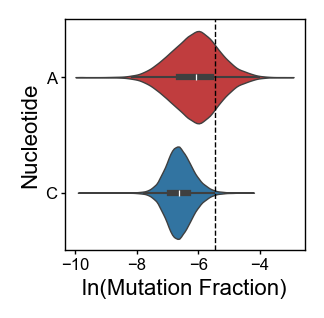

In [9]:
fig, ax = plt.subplots(figsize=(2.0, 1.5), dpi=200)
ax = sns.violinplot(data=df_wc, x="ln_r_data", y="r_nuc", hue="r_nuc", density_norm='width', palette=["tab:red", "tab:blue"], legend=False, linewidth=0.5, ax=ax)
ax.axvline(-5.45, color="black", linestyle="--", lw=0.5)
ax.set_ylabel("Nucleotide", labelpad=2)
ax.set_xlabel("ln(Mutation Fraction)", labelpad=2)
ax.set_xticks([-10, -8, -6, -4])
format_small_plot(ax)